In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman03-22.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman02-05.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-24.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman05-26.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman04-00.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman02-00.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-21.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman04-18.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman05-01.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-12.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-03.png
/kaggle/in

In [2]:
import os
import random
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from ipywidgets import widgets

In [3]:
TRAIN_DIR = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train'
VAL_DIR = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation'


In [4]:
train_horse_dir = os.path.join(TRAIN_DIR, 'horses')
train_human_dir = os.path.join(TRAIN_DIR, 'humans')

validation_horse_dir = os.path.join(VAL_DIR, 'horses')
validation_human_dir = os.path.join(VAL_DIR, 'humans')

In [5]:
train_horses_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horses_names[:10]}')

train_humans_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMAN: {train_humans_names[:10]}')

validation_horses_names = os.listdir(validation_horse_dir)
print(f'VALIDATION SET HORSES: {validation_horses_names[:10]}')

validation_humans_names = os.listdir(validation_human_dir)
print(f'VALIDATION SET HUMANS: {validation_humans_names[:10]}')

TRAIN SET HORSES: ['horse46-4.png', 'horse40-1.png', 'horse06-2.png', 'horse07-7.png', 'horse48-3.png', 'horse32-5.png', 'horse08-2.png', 'horse50-7.png', 'horse23-3.png', 'horse11-8.png']
TRAIN SET HUMAN: ['human06-23.png', 'human16-08.png', 'human14-28.png', 'human16-13.png', 'human12-30.png', 'human16-16.png', 'human11-03.png', 'human13-08.png', 'human08-00.png', 'human10-03.png']
VALIDATION SET HORSES: ['horse3-469.png', 'horse1-276.png', 'horse5-400.png', 'horse2-314.png', 'horse6-544.png', 'horse4-503.png', 'horse1-264.png', 'horse4-389.png', 'horse1-411.png', 'horse1-539.png']
VALIDATION SET HUMANS: ['valhuman03-22.png', 'valhuman02-05.png', 'valhuman01-24.png', 'valhuman05-26.png', 'valhuman04-00.png', 'valhuman02-00.png', 'valhuman01-21.png', 'valhuman04-18.png', 'valhuman05-01.png', 'valhuman01-12.png']


In [6]:
print(f'Total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'Total training human imagens: {len(os.listdir(train_human_dir))}')
print(f'Total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'Total validation human images: {len(os.listdir(validation_horse_dir))}')

Total training horse images: 500
Total training human imagens: 527
Total validation horse images: 128
Total validation human images: 128


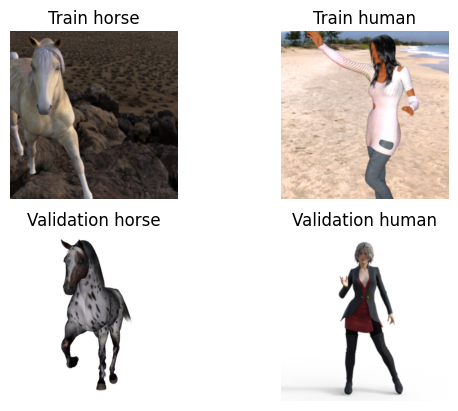

In [7]:
index = 42

train_horse = train_horse_dir + '/' + train_horses_names[index]
train_horse_img = mpimg.imread(train_horse)

train_human = train_human_dir + '/' + train_humans_names[index]
train_human_img = mpimg.imread(train_human)

validation_horse = validation_horse_dir + '/' + validation_horses_names[index]
validation_horse_img = mpimg.imread(validation_horse)

validation_human = validation_human_dir + '/' + validation_humans_names[index]
validation_human_img = mpimg.imread(validation_human)

plt.subplot(2,2,1)
plt.axis('off')

plt.title('Train horse')
plt.imshow(train_horse_img)


plt.subplot(2,2,2)
plt.axis('off')
plt.title('Train human')
plt.imshow(train_human_img)

plt.subplot(2,2,3)
plt.axis('off')
plt.title('Validation horse')
plt.imshow(validation_horse_img)

plt.subplot(2,2,4)
plt.axis('off')
plt.title('Validation human')
plt.imshow(validation_human_img)

plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(300,300,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,816,161 (26.00 MB)

 Trainable params: 6,816,161 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics = ['accuracy']
)

In [11]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size = (300,300),
    batch_size = 32,
    label_mode = 'binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size = (300,300),
    batch_size = 32,
    label_mode = 'binary'
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [12]:
rescale_layer = tf.keras.layers.Rescaling(1./255)

train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))
validation_dataset_scaled = validation_dataset.map(lambda image, label: (rescale_layer(image), label))

In [13]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (
    train_dataset_scaled
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

validation_dataset_final = (
    validation_dataset_scaled
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

In [14]:
history = model.fit(
    train_dataset_final,
    epochs = 15,
    validation_data = validation_dataset_final,
    verbose = 2
)

Epoch 1/15
33/33 - 19s - 579ms/step - accuracy: 0.5881 - loss: 0.7623 - val_accuracy: 0.6602 - val_loss: 0.6345
Epoch 2/15
33/33 - 1s - 42ms/step - accuracy: 0.8053 - loss: 0.4745 - val_accuracy: 0.8789 - val_loss: 0.6032
Epoch 3/15
33/33 - 1s - 42ms/step - accuracy: 0.8744 - loss: 0.4845 - val_accuracy: 0.8477 - val_loss: 1.0091
Epoch 4/15
33/33 - 1s - 42ms/step - accuracy: 0.9377 - loss: 0.1788 - val_accuracy: 0.7891 - val_loss: 1.8669
Epoch 5/15
33/33 - 1s - 43ms/step - accuracy: 0.9348 - loss: 0.1626 - val_accuracy: 0.8828 - val_loss: 0.4834
Epoch 6/15
33/33 - 1s - 42ms/step - accuracy: 0.9513 - loss: 0.1656 - val_accuracy: 0.8711 - val_loss: 0.9025
Epoch 7/15
33/33 - 1s - 42ms/step - accuracy: 0.9815 - loss: 0.0646 - val_accuracy: 0.8242 - val_loss: 1.6463
Epoch 8/15
33/33 - 1s - 42ms/step - accuracy: 0.9601 - loss: 0.2501 - val_accuracy: 0.7852 - val_loss: 2.1049
Epoch 9/15
33/33 - 1s - 42ms/step - accuracy: 0.9951 - loss: 0.0140 - val_accuracy: 0.8633 - val_loss: 1.9043
Epoch 10

In [15]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()